In [1]:
# Run this cell to load all required Python libraries
import numpy as np
from datascience import *

import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

# Lab 3 – Data Visualization

## Data 6, Summer 2024
So far, we have discussed methods to interpret the data, but what if we want to present our data in a visual format? In this lab, you'll learn several important table methods for producing data visualizations. **Visualizations** are some of the most powerful tools in data science; they're helpful for showing data to people who don't necessarily have a background in data science, and allow data scientists like yourselves to help others understand the data in a more intuitive way.

In Lecture 8, we talked about methods we could use to visualize one variable, namely the `barh` and `hist` methods. We added the `scatter` and `plot` methods in Lecture 9. These methods allow us to visualize two or more variables at once, which can open up more patterns in the data and can further improve your ability to visualize data for people who do not necessarily understand data science.

As data scientists, it is not only our job to be able to implement various visualization methods, but also to know *when* to use each method. As we build our toolkit of visualization techniques going forward, it's important to understand the **advantages and disadvantages of each visualization type.**

We will be working with a `salary` dataset that includes information on jobholders and their salaries, combined from multiple surveys, job postings, and other public sources.

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Part 1: Data Visualization Methods for One Variable

Let's begin by loading in the original `Salary_Data.csv` file.

In [2]:
salary = Table.read_table("data/Salary_Data.csv")
salary.show(5)

Age,Gender,Education Level,Job Title,Years of Experience,Salary
32,Male,Bachelor's,Software Engineer,5,90000
28,Female,Master's,Data Analyst,3,65000
45,Male,PhD,Senior Manager,15,150000
36,Female,Bachelor's,Sales Associate,7,60000
52,Male,Master's,Director,20,200000


### Contextualizing the Data
As data scientists, it's important to take a look at the data we're working with to understand the information we have available to us. Take some time to look at our `salary` table and try to understand what information we have.

### Question 1.1 (Discussion)
What information does our table tell us? Additionally, what does each record (i.e. row) represent?

**SOLUTION:** Table tells us information about salaries of individuals based on years of experience, education, job, gender, and age.

### Question 1.2 (Discussion)
Are there any features (columns) of the data that may affect one another? What patterns can we learn from this data?

**SOLUTION:** We might expect age, years of experience, and/or education level to be somewhat correlated. We can also look into how different stratifications of gender and job title individually play a role on salary.

---
### **The [barh](http://data8.org/datascience/_autosummary/datascience.tables.Table.barh.html#datascience.tables.Table.barh) method**

The `barh` (horizontal bar chart) method is used to visualize **categorical** variable values. Categorical variables are non-numbers, like names and qualities (Color, Gender, Name etc.). As we saw in lecture, categorical variables come in 2 different types: *ordinal* and *nominal*. Refer to the Lecture 8 Slides linked on [the course site](https://data6.org/su23) to see the difference between the two types.

The `barh` method takes in 1 mandatory argument, which is the **name of the column** you want on the left (vertical) axis of your `barh` plot. There are also optional arguments that have to do with plotting -- you'll see examples of those in this lab and in the homework. The remaining optional arguments in the `datascience` documentation linked above can also be used, feel free to try out some of the others on your own!

**Important note:** To use the `barh` method properly, we first need to select the columns we want to see in the graph. We should not call `barh` directly on a large `Table` because without specifying a column, we get a bar graph for every single instance of every single variable, which you can imagine results in a lot of bar graphs. Therefore, in the cell below and throughout the lab **we load in some pre-cleaned, smaller versions of our `salary` dataset to make visualizing the data easier.** This data cleaning process required the use of methods that are complicated in the `datascience` package but easier with other data science libraries, and much of it is out of scope for this course. Just focus on the methods and functions for creating the visualizations throughout the lab!

In [3]:
# Just run this cell to load a table with gender counts
gender = Table.read_table("data/gender.csv")
gender

Gender,count
Female,3014
Male,3674
Other,14


Since this cleaned version of the gender counts only has three distinct rows, we can plot it with `barh`. The plot below results in one bar for each gender category, corresponding to the number of rows in the table with that value. 

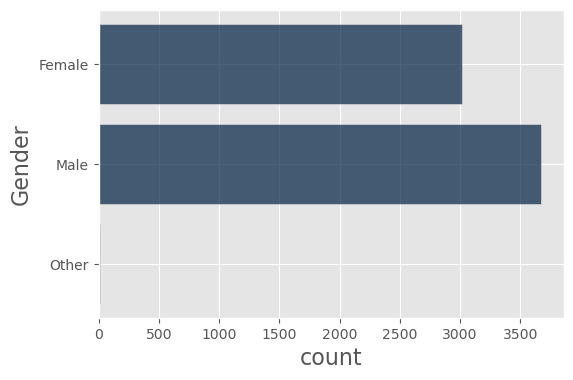

In [4]:
gender.barh("Gender")

Next, we can try to create the same graph to visualize education levels!

In [5]:
# Just run this cell -- don't worry about this `group` method
education = salary.group("Education Level")
education

Education Level,count
Bachelor's,756
Bachelor's Degree,2267
High School,448
Master's,288
Master's Degree,1573
PhD,1368
nan,3
phD,1


We see above that there are different values that actually mean the same thing ("Bachelor's" vs "Bachelor's Degree", etc.). To make sure all of the value names are consistent, we load a cleaner version of the education level counts into a table called `education`.

In [6]:
education = Table.read_table("data/education.csv")
education

Education Level,count
High School,448
Bachelor's Degree,3023
Master's Degree,1861
PhD,1369
nan,3


### Question 1.3
Following the example of the `gender` bar chart above, plot a horizontal bar chart that shows the counts of each category from the `"Education Level"` column.

*Hint*: Use the `education` table.

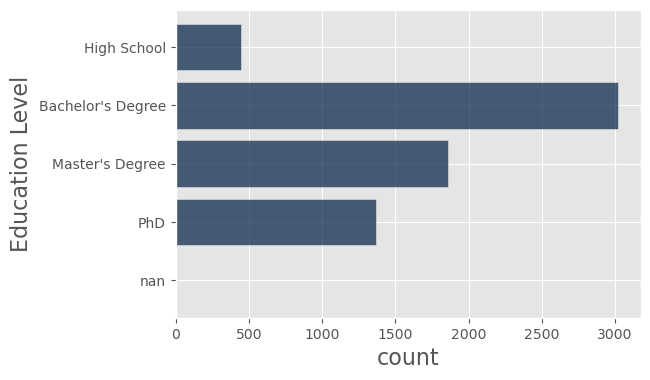

In [7]:
# Replace the ... with the necessary code to plot the bar chart
education.barh("Education Level") # SOLUTION NO PROMPT

### Multiple Columns

We can also use `barh` to see multiple statistics at once. Let's use the `barh` method to see the average number of both *age* and *years of experience* for each eduction level. We'll be using the following columns:
1. `"Years of Experience"`: The average years of experience of the employees with that education level
2. `"Age"`: The average age of the employees with that education level

Run the following cell to load an aggregated version of the dataset that contains the average statistics for each education level.

In [8]:
education_averages = Table.read_table("data/averages.csv")
education_averages

Education Level,Salary Average,Years of Experience Average,Age Average
High School,36706.7,1.91518,26.8549
Bachelor's Degree,95082.9,5.41976,30.2607
Master's Degree,130112,9.64481,35.1693
PhD,165651,13.9153,41.1549
nan,100000,7,27


To look at *only* years of experience and age average for each education level, we need to select the `"Education Level"`, `"Years of Experience Average"`, and `"Age Average"` columns. We will discuss this method in the next lab, so don't worry if it doesn't make sense for now.

In [9]:
age_experience = education_averages.select("Education Level", "Years of Experience Average", "Age Average")
age_experience

Education Level,Years of Experience Average,Age Average
High School,1.91518,26.8549
Bachelor's Degree,5.41976,30.2607
Master's Degree,9.64481,35.1693
PhD,13.9153,41.1549
nan,7,27


Run the following cell to show an example of how to create an **overlaid bar chart** with two statistics.

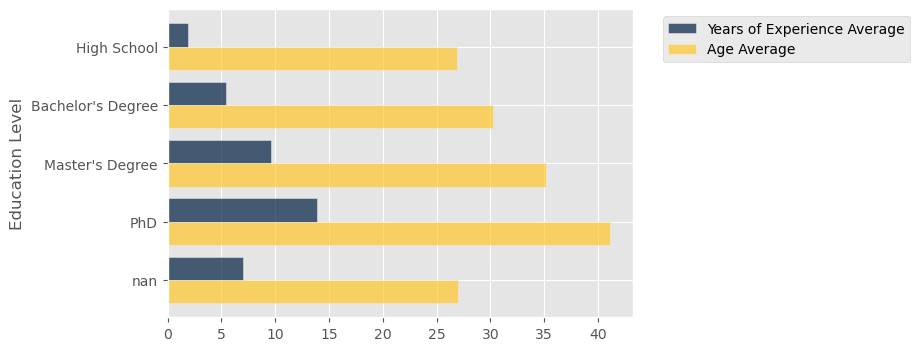

In [10]:
age_experience.barh("Education Level", overlay = True)

If we want different visualizations for each variable, we can set the optional `overlay` argument to `False`. The default value of `overlay` is `True`, so if you don't give it a value, you will get a plot with all the included variables at once.

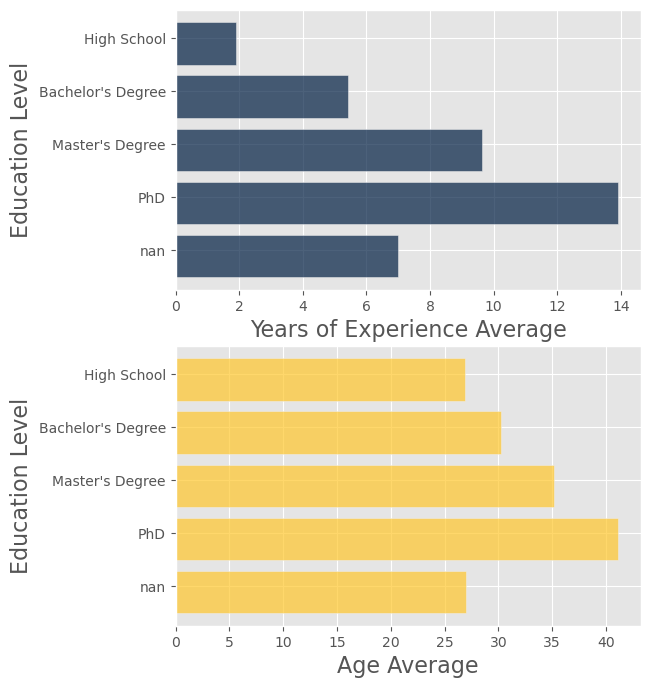

In [11]:
age_experience.barh("Education Level", overlay = False)

This way, we can choose if we want to create one plot with all our information or a new plot for each piece of information!

### Where `barh` fails

The `barh` method works well on categorical variables, but what if we have a **numerical** variable that we want to see the distribution of? Let's see what happens if we try to use `barh` on a numerical variable (`"Salary"`) instead of a categorical variable:

In [12]:
# Just run this cell -- don't worry about the group method
salary.group('Salary')

Salary,count
350,1
550,1
30000,66
35000,138
40000,100
45000,76
47898,1
50000,185
51831,1
52612,4


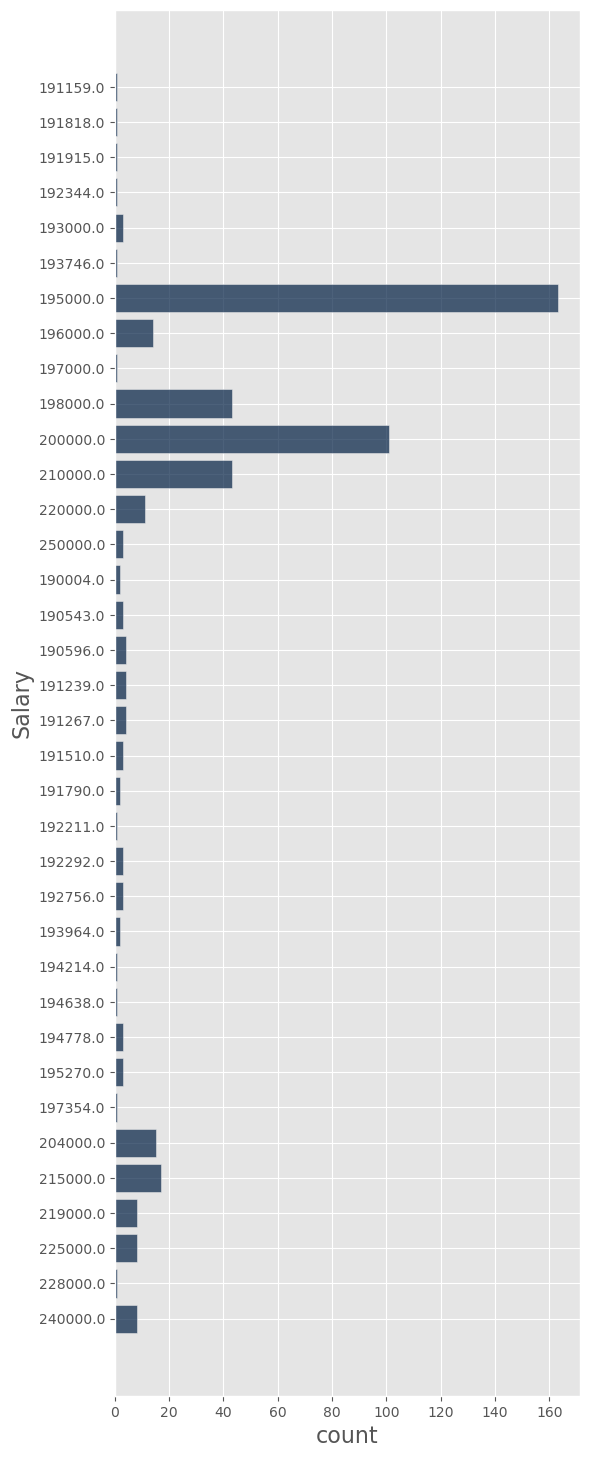

In [13]:
# Just run this cell -- don't worry about the group or where method
salary.group("Salary").where('Salary', are.above(190000)).barh("Salary")

As you can see, this bar plot is not particularly helpful. There are many categories that seem to not have any corresponding bar. Yet, that isn't the case! Seeing the breakdown of `"Salary"` does not provide us with any useful information, and it is also difficult to read or understand. Instead, for numerical variables, we have another visualization method that helps us visualize a numerical variable's distribution: **histograms**.

---
### **The [hist](http://data8.org/datascience/_autosummary/datascience.tables.Table.hist.html#datascience.tables.Table.hist) method**

The `hist` method allows us to see the distribution of a numerical variable. `hist` takes in 1 mandatory argument and has several optional arguments (feel free to look through the documentation and explore these optional arguments as before). **Remember: categorical variables should be visualized using `barh`, and numerical variables should be visualized using `hist`.**

Let's take a look at the distribution of salaries among people to see how the `hist` method helps visualize numerical variables. We'll use the `salary` table to create this histogram.

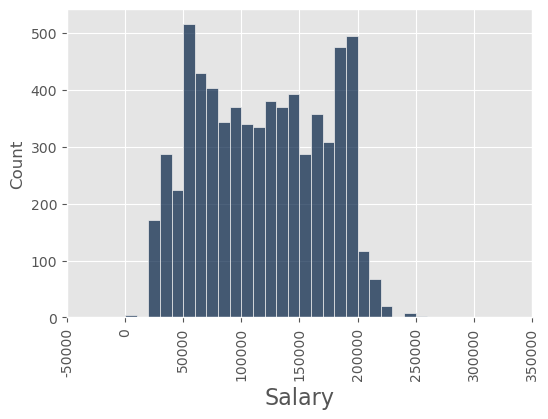

In [14]:
# This plot shows the distribution of salaries among employees
my_bins = np.arange(0, 300000, 10000)
salary.hist("Salary", density = False, bins = my_bins)

This shows us that most people have a salary between around 50,000 and 190,000. But there are also many people whose salaries are not in this range, due to how we specified the bins.

### Question 1.4
Fill in the following code cell to produce a histogram representing the **distribution of years of experience** for employees.

*Note*: Set the optional `bins` argument of the `hist` method to `my_bins`. We've provided this variable for you.

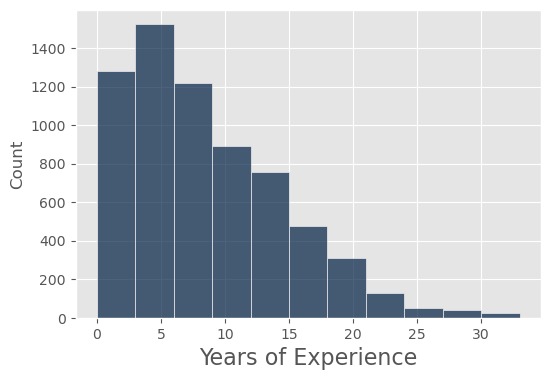

In [15]:
my_bins = np.arange(0, 35, 3)
salary.hist("Years of Experience", density = False, bins = my_bins) # SOLUTION NO PROMPT

### Bachelor's Degree vs. Master's Degree

Below, we load a cleaner general version of our dataset called `clean_salary` that ensures the value names are consistent (i.e. "Bachelor's" and "Bachelor's Degree" are now both "Bachelor's Degree").

In [16]:
clean_salary = Table.read_table("data/clean_data.csv")
clean_salary

Age,Gender,Education Level,Job Title,Years of Experience,Salary
27,Male,nan,Developer,7,100000
32,Male,Bachelor's Degree,Software Engineer,5,90000
36,Female,Bachelor's Degree,Sales Associate,7,60000
29,Male,Bachelor's Degree,Marketing Analyst,2,55000
31,Male,Bachelor's Degree,Sales Manager,4,80000
26,Female,Bachelor's Degree,Marketing Coordinator,1,45000
48,Female,Bachelor's Degree,HR Manager,18,140000
35,Male,Bachelor's Degree,Financial Analyst,6,65000
27,Male,Bachelor's Degree,Customer Service Rep,2,40000
44,Male,Bachelor's Degree,Operations Manager,16,125000


We can use `hist` on a `Table` with just rows for these two education levels and use the optional `group` argument.

*Note*: You'll see how `are.contained_in` works with the `where` method in the next lab. For now, think of it as finding any rows corresponding to *either* `"Bachelor's Degree"` or `"Master's Degree"`.

In [17]:
# Just run this cell to create the `bachelor_master` table
bachelor_master = clean_salary.where("Education Level", are.contained_in(["Bachelor's Degree", "Master's Degree"]))
bachelor_master.show(5)

Age,Gender,Education Level,Job Title,Years of Experience,Salary
32,Male,Bachelor's Degree,Software Engineer,5,90000
36,Female,Bachelor's Degree,Sales Associate,7,60000
29,Male,Bachelor's Degree,Marketing Analyst,2,55000
31,Male,Bachelor's Degree,Sales Manager,4,80000
26,Female,Bachelor's Degree,Marketing Coordinator,1,45000


### Question 1.5
Now that we've created our `bachelor_master` table, fill in the following code cell to produce a histogram representing the ***distribution of salary*** for *both* people with a bachelor's degree and people with a master's degree.

*Hint*: Take a look at the optional `group` argument in the documentation.

*Note*: Set the optional `bins` argument of the `hist` method to `my_bins`. We've provided this variable for you.

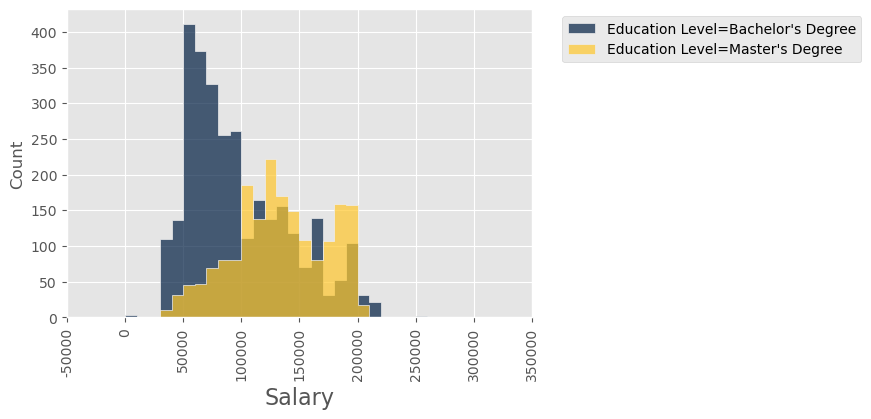

In [18]:
# This plot shows the distribution of salary for people with a bachelor's degree AND master's degree
my_bins = np.arange(0, 300000, 10000)
bachelor_master.hist("Salary", density = False, group = "Education Level", bins = my_bins) # SOLUTION NO PROMPT

It appears that salary for those with a **master's degree** is higher, on average, than those with a bachelor's degree. The plot above shows the master's degree salary to be shifted to the right of the bachelor's degree salary. We can also take a look at a subset of the `education_averages` table to find the same information numerically:

In [19]:
# Makes a table with education level and salary average from our `education_averages` table
salary_average = education_averages.select("Education Level", "Salary Average")
salary_average

Education Level,Salary Average
High School,36706.7
Bachelor's Degree,95082.9
Master's Degree,130112
PhD,165651
nan,100000


Above, we created a basic `salary_average` table that gives us the average salary of each education level. Using this table, we can access the rows that correspond to the bachelor's degree salary average and the master's degree salary average.

In [20]:
bachelors_avg = salary_average.where("Education Level", "Bachelor's Degree")
masters_avg = salary_average.where("Education Level", "Master's Degree")

In [21]:
print(f"Bachelor's Degree salary average:\t{bachelors_avg.column('Salary Average')[0]}")
print(f"Master's Degree salary average:\t{masters_avg.column('Salary Average')[0]}")

Bachelor's Degree salary average:	95082.9086395
Master's Degree salary average:	130112.056452


As we can see, the conclusion we reached from the bar chart appeared to line up with the information from the table operations. This is a benefit of visualization: information can be learned about the dataset with just visual observation. It is always beneficial to back your claims about data with concrete facts about the dataset, but **visualizations can help abstract away some of the confusion of looking at raw data** so that non-data-scientists can better understand what is going on.

### Bachelor's Degree vs. PhD

Next, we'll explore the effect of trying to compare visualizations of two values that contain very different proportions of the data. To do so, we'll compare bachelor's degree holders to PhD holders:

In [22]:
# Just run this cell
bachelors = clean_salary.select("Education Level", "Salary").where("Education Level", "Bachelor's Degree")
phd = clean_salary.select("Education Level", "Salary").where("Education Level", "PhD")
print(f"People with a Bachelor's education level in cleaned dataset: {bachelors.num_rows}")
print(f"People with a PhD education level in cleaned dataset: {phd.num_rows}")

People with a Bachelor's education level in cleaned dataset: 3023
People with a PhD education level in cleaned dataset: 1369


Each individual plot looks fine:

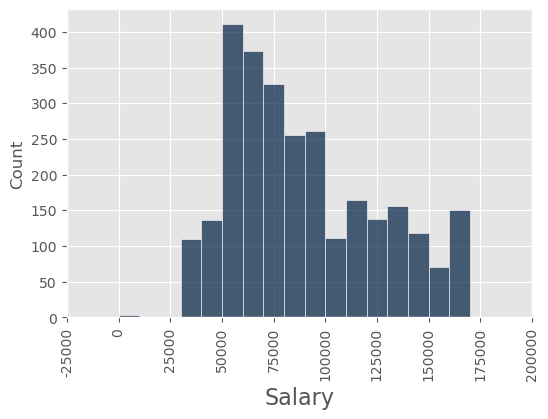

In [23]:
# This plot shows the distribution of salary for those with a bachelor's degree
my_bins = np.arange(0, 180000, 10000)
bachelors.hist("Salary", density = False, bins = my_bins)

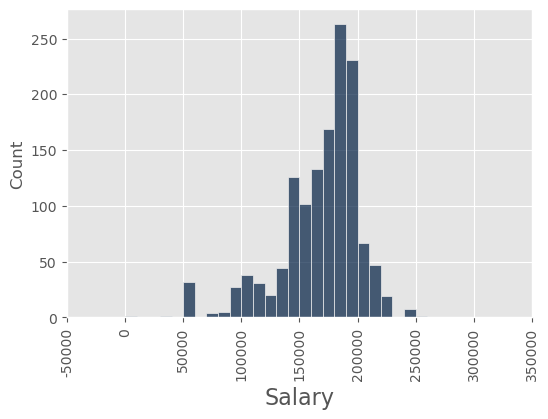

In [24]:
# This plot shows the distribution of salary for those with a PhD
my_bins = np.arange(0, 300000, 10000)
phd.hist("Salary", density = False,  bins = my_bins)

Take a look at the y-axis on both of these plots. What do you think will happen when we try to plot them on the same graph?

In [25]:
# Just run this cell
bachelor_phd = clean_salary.select("Education Level", "Salary").where("Education Level", are.contained_in(["Bachelor's Degree", "PhD"]))
bachelor_phd.show(5)

Education Level,Salary
Bachelor's Degree,90000
Bachelor's Degree,60000
Bachelor's Degree,55000
Bachelor's Degree,80000
Bachelor's Degree,45000


### Question 1.6
Using the code in **Question 1.5** as reference, produce a histogram showing the distribution of salary for people with a *PhD* and people with a *bachelor's degree*. What do you notice about this plot?

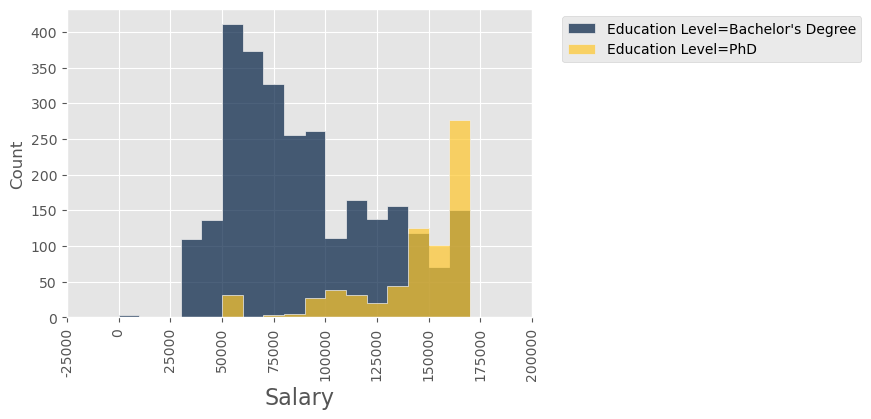

In [26]:
my_bins = np.arange(0, 180000, 10000)
bachelor_phd.hist("Salary", density = False, group = "Education Level", bins = my_bins) # SOLUTION NO PROMPT

As you can see, there are way more people with a bachelor's degree than a PhD in this dataset, so it is quite difficult to make a comparison between them!

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Part 2: Data Visualization Methods for Multiple Variables

### **The [scatter](http://data8.org/datascience/_autosummary/datascience.tables.Table.scatter.html#datascience.tables.Table.scatter) method**

As we mentioned, visualizing two variables can show us patterns in the data. The `scatter` method allows us to see the relationship between two numerical variables in our data by producing a **scatter plot**. The first provided column name goes along the x-axis and the second goes along the y-axis.

Let's take a look at the relationship between **years of experience** and **salary** using our `clean_salary` table.

### Producing Scatter Plots

Now, we can call `scatter` on the `clean_salary` table. Run the following cell to do so.

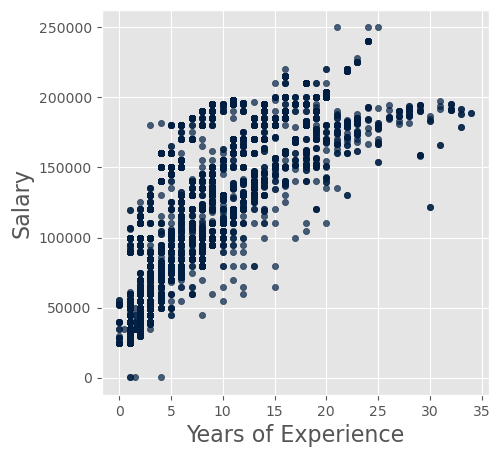

In [27]:
clean_salary.scatter("Years of Experience", "Salary")

Just like that, you've produced your first scatter plot! It looks a little messy, however. Often, scatter plots can suffer from what's known as **[overplotting](https://www.displayr.com/what-is-overplotting/)**: when many data points fall on top of each other, creating a blob of data. When this happens, it's often difficult to see the individual data points.

To fix this, we can focus in on a smaller subset of the data. In this case, we'll look at individuals who have a PhD education level.

In [28]:
# Create a smaller subset of data; only individuals with a PhD
scatter_phd = clean_salary.where("Education Level", "PhD")
scatter_phd

Age,Gender,Education Level,Job Title,Years of Experience,Salary
45,Male,PhD,Senior Manager,15,150000
38,Male,PhD,Senior Scientist,10,110000
39,Male,PhD,Senior Engineer,12,115000
43,Female,PhD,Senior Consultant,15,140000
46,Male,PhD,Senior Manager,20,170000
38,Male,PhD,Senior Scientist,11,120000
43,Male,PhD,Senior Engineer,17,140000
47,Male,PhD,Senior Data Scientist,21,180000
45,Male,PhD,Research Director,16,190000
52,Male,PhD,Chief Technology Officer,24,250000


### Question 2.1
Using the `scatter_phd` table, produce a scatter plot that plots `"Years of Experience"` on the x-axis and `"Salary"` on the y-axis. Your code should be very similar to the previous scatter plot.

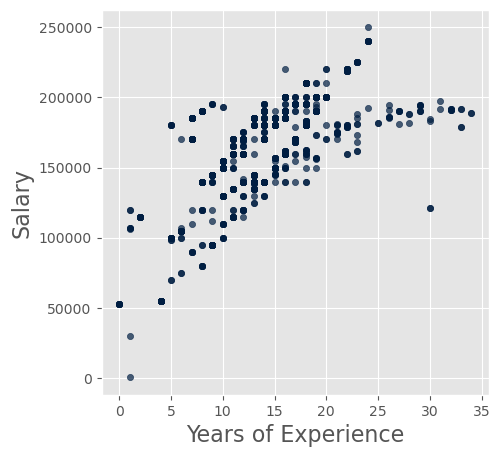

In [29]:
# Replace the ... with the necessary code to plot the scatter plot
scatter_phd.scatter("Years of Experience", "Salary") # SOLUTION NO PROMPT

That looks a little better! There is still a cluster of data points in the bottom left corner, but a relationship can be seen between the two variables.

### Question 2.2 (Discussion)
What relationship between years of experience and salary does the above scatter plot reveal? Discuss with someone around you and check in with your GSI once you've agreed on an answer.

**SOLUTION:** We can see a bit of a positive correlation between years of experience and salary. Higher years of experience on average seems to correlate with a higher salary.

### Optional argument: `group`

The `scatter` method also allows you to specify specific a group for each data point using the `group` keyword arguments.

Say we wanted to investigate the relationship between an individual's **years of experience** and their **salary** with respect to their reported **gender**.

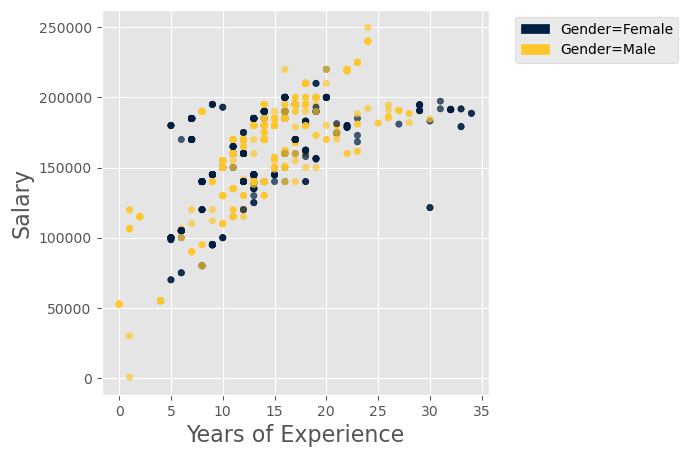

In [31]:
scatter_phd.scatter("Years of Experience", "Salary", group = "Gender")

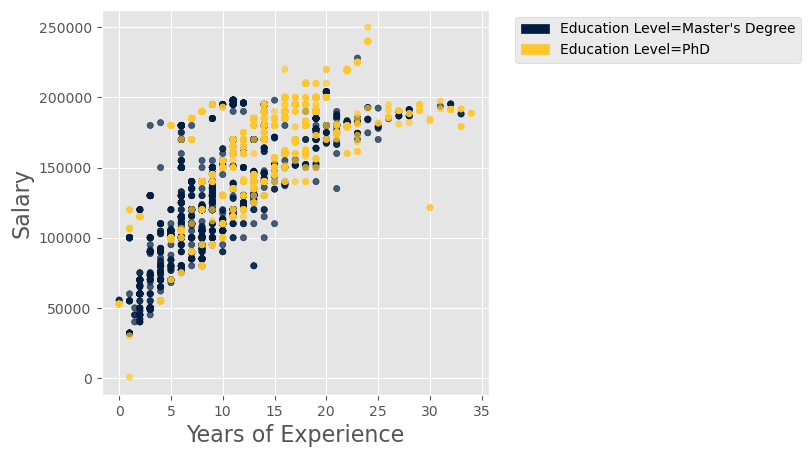

In [32]:
# TODO: delete later; testing out master's vs PhD instead of gender
scatter_phd_master = clean_salary.where("Education Level", are.contained_in(['PhD', "Master's Degree"]))
scatter_phd_master.scatter('Years of Experience', 'Salary', group = 'Education Level')

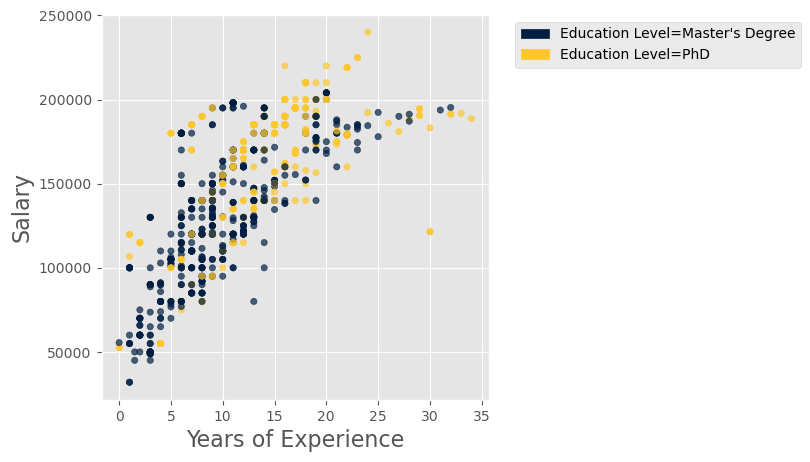

In [36]:
scatter_phd_master_sampled = scatter_phd_master.sample(1000, with_replacement = False)
scatter_phd_master_sampled.scatter('Years of Experience', 'Salary', group = 'Education Level')

TODO: replace text for what group argument helps us do, when we figure out which variable we're using

### Question 2.3 (Discussion)
Are there any patterns you can notice from the scatter plot? Gender biases, when one gender is given preferential treatment (promotions, higher salaries, less work, etc.) over another or when there is a prejudice against one gender, can be prevalent within the workplace. Does this scatter plot show any gender biases? What might this look like in a real-world setting?

**SOLUTION:** The plot doesn't seem to show any prevalent gender biases (i.e. more female points being lower than male points). We see one small subset of male points around 20-25 years of experience that have the highest salaries, and we also notice a number of females from 30-35 years of experience with salaries under 200k, but aside from these subsets, there is no strong evident gender bias. It's important to note that this trend might look different for the full data that wasn't filtered by PhD holders only.

Scatter plots are useful when visualizing two numerical variables together. If you want to plot two numerical variables but one variable corresponds to time, we can use a line plot to visualize this instead.

---
### **The [plot](http://data8.org/datascience/_autosummary/datascience.tables.Table.plot.html#datascience.tables.Table.plot) method**

Similar to `scatter`, we give plot the names of two numerical columns and it creates a **line plot** for us. If we want to draw multiple line plots on the same set of axes, we give it a table with multiple numerical columns, and tell it which one contains the values for the x-axis.

The `plot` method allows us to see how non-time variables change over time. Let's use `plot` to look at the age patterns over the course of years of experience. First, we will look at a single line plot using `plot`:

In [38]:
experience_age = Table.read_table("data/experience_age_avg.csv")
experience_age

Years of Experience,Age Average
0,23.2917
0.5,23
1,25.2111
1.5,27.8333
2,26.5607
3,27.7458
4,28.7069
5,29.6591
6,31.1868
7,31.6997


### Question 2.4
Using the `experience_age` table and the `plot` method, produce a *line plot* that plots the average age over years of experience.

*Hint*: You'll want to plot the years of experience on the x-axis and average age on the y-axis.

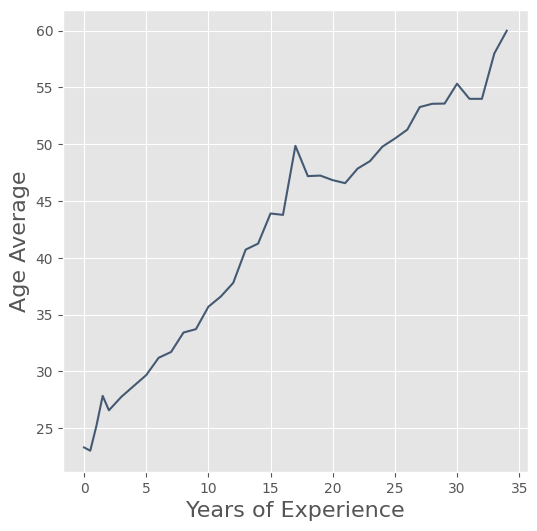

In [39]:
# Replace the ... with the necessary code to plot the scatter plot
experience_age.plot("Years of Experience", "Age Average") # SOLUTION NO PROMPT

### Identifying Temporal Patterns

Line plots are incredibly effective tools for identifying temporal patterns (i.e. changes over time). Let's utilize our newfound knowledge of the `plot` method to uncover underlying temporal patterns within each education level as they get more years of experience. Run the following cells to load the datasets for each education level and create their respective plots. Analyze the graphs and answer the question that follows.

In [57]:
hs_salary_avg = Table.read_table("data/hs.csv")
bachelor_salary_avg = Table.read_table("data/bachelors.csv")
master_salary_avg = Table.read_table("data/masters.csv")
phd_salary_avg = Table.read_table("data/phd.csv")

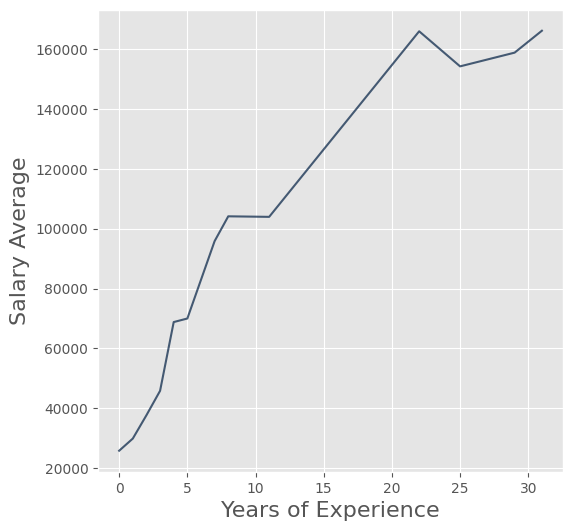

In [61]:
# Run this cell to produce a line plot for the high school education salary average
hs_salary_avg.plot("Years of Experience", "Salary Average")

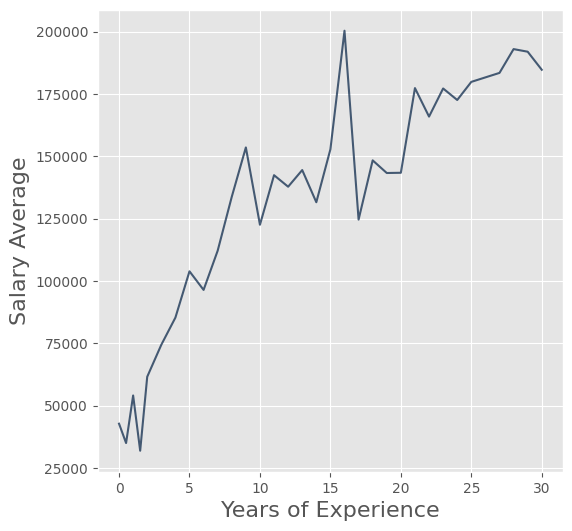

In [58]:
# Run this cell to produce a line plot for the bachelor's degree salary average
bachelor_salary_avg.plot("Years of Experience", "Salary Average")

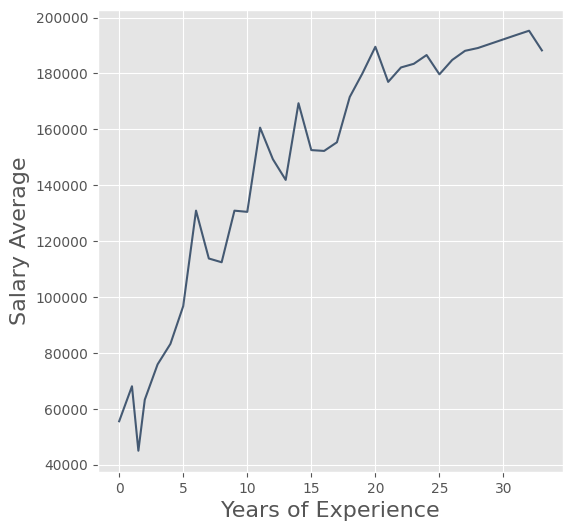

In [59]:
# Run this cell to produce a line plot for the master's degree salary average
master_salary_avg.plot("Years of Experience", "Salary Average")

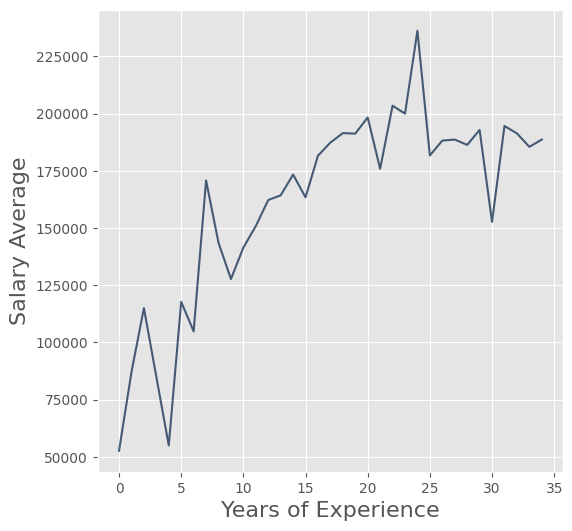

In [60]:
# Run this cell to produce a line plot for the PhD salary average
phd_salary_avg.plot("Years of Experience", "Salary Average")

### Question 2.5 (Discussion)
What patterns do you notice when comparing these line plots? Do any of them stand out to you? Do the results you are seeing make sense with respect to your knowlege of education levels?

**SOLUTION:** We see that for all education levels, salary tends to increase over time (as years of experience build up). It can sometimes be hard to compare line graphs on separate plots like this due to the differences in the axes values, but we see that the PhD starts out at the highest salary with 0 years of experience, while the high school education starts out at the lowest. Probably what most students would expect and what we've seen in the lab so far.

### Multiple Variables
If we want to visualize multiple variables on one plot, we can include them all in the table we call `plot` on.

In [62]:
experience_age_salary = Table.read_table("data/experience_age_salary_avg.csv")
experience_age_salary

Years of Experience,Salary Average,Age Average
0,29680.2,23.2917
0.5,35000,23
1,46992.8,25.2111
1.5,36279.2,27.8333
2,58699.5,26.5607
3,72944.4,27.7458
4,83332.1,28.7069
5,103111,29.6591
6,111891,31.1868
7,122108,31.6997


Since we are trying to compare `"Salary Average"` and `"Age Average"` and their units are different, we have to manipulate the data before plotting. To do this, let's first divide the `"Salary Average"` column by 1000 to get a better sense of the relationship. The cell below does this data manipulation for you.

In [63]:
experience_age_salary = experience_age_salary.with_column('Salary Average', experience_age_salary.column('Salary Average') / 1000)
experience_age_salary

Years of Experience,Salary Average,Age Average
0,29.6802,23.2917
0.5,35,23
1,46.9928,25.2111
1.5,36.2792,27.8333
2,58.6995,26.5607
3,72.9444,27.7458
4,83.3321,28.7069
5,103.111,29.6591
6,111.891,31.1868
7,122.108,31.6997


### Question 2.6
Using the `experience_age_salary` table, produce a scatter plot with *one line per variable* other than `"Years of Experience"`. That is, `"Years of Experience"` should be plotted on the x-axis.

In [59]:
# Replace the ... with the necessary code to plot the scatter plot
experience_age_salary.plot("Years of Experience", ["Salary Average", "Age Average"]) # SOLUTION NO PROMPT

---
## Done! 😇

That's it! There's nowhere for you to submit this, as labs are not assignments. However, please ask any questions you have with this notebook in lab or on Ed.

There are no extra problems this week, good luck with the homework!

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
#grader.check_all()